# Rotation Image From Boxes

In [16]:
import cv2
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from CRAFT import CRAFTModel, draw_boxes, draw_polygons, boxes_area, polygons_area

In [3]:
model = CRAFTModel('cuda', use_refiner=True, fp16=True)

/home/nguyenhao/miniconda3/envs/mc_ocr/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nguyenhao/miniconda3/envs/mc_ocr/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/nguyenhao/Source/MC_OCR/MC_OCR/Documentation/Text_Detection/CRAFT_Text_Detection/CRAFT/craft.py:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models fo

In [126]:
# Read image
img = cv2.imread('../../../dataset/train_images_segmented/mcocr_public_145013dylla.jpg')

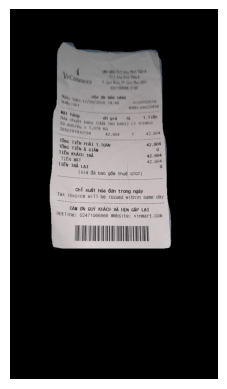

In [127]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [128]:
img.shape

(1024, 576, 3)

In [129]:
#Get boxes from model
boxes = model.get_boxes(img)
print(boxes)

[[[252, 166], [379, 164], [379, 179], [252, 181]], [[147, 170], [231, 196], [224, 217], [141, 191]], [[273, 184], [360, 184], [360, 195], [273, 195]], [[256, 196], [380, 196], [380, 211], [256, 211]], [[278, 212], [356, 212], [356, 224], [278, 224]], [[140, 233], [305, 254], [302, 274], [138, 254]], [[224, 236], [323, 238], [323, 252], [223, 250]], [[141, 247], [196, 261], [192, 275], [137, 262]], [[340, 254], [406, 250], [406, 262], [340, 265]], [[327, 268], [414, 264], [414, 276], [328, 281]], [[141, 278], [196, 290], [193, 304], [138, 292]], [[369, 292], [409, 292], [409, 305], [369, 305]], [[137, 293], [397, 308], [396, 331], [136, 316]], [[257, 297], [297, 297], [297, 310], [257, 310]], [[139, 310], [273, 326], [271, 342], [137, 326]], [[136, 323], [227, 337], [225, 352], [133, 338]], [[375, 341], [417, 337], [418, 348], [376, 352]], [[264, 342], [304, 342], [304, 353], [264, 353]], [[136, 353], [281, 370], [279, 388], [134, 371]], [[376, 371], [419, 366], [420, 378], [377, 383]],

In [130]:
# Rotation image
def rotate_img(img, boxes):
  boxes_ratio = []
  direct_rotate = []
  width, height =  [], []
  for box in boxes:
    x1, y1, x2, y2 = box[0][0], box[0][1], box[1][0], box[1][1]
    width.append(abs(box[2][0] - box[0][0]))
    height.append(abs(box[2][1] - box[0][1]))
    box_ratio = abs(y1 - y2) / abs(x1 - x2)
    direct_rotate.append(y1 - y2)
    boxes_ratio.append(box_ratio)
  mean_ratio = np.mean(boxes_ratio)
  direction = np.mean(direct_rotate)
  width_mean = np.mean(width)
  height_mean = np.mean(height)
  #Radian Angle
  radian_angle = np.arctan(mean_ratio)
  if direction >= 0:
    degree_angle = -np.degrees(radian_angle)
  else:
    degree_angle = np.degrees(radian_angle)
  # Rotate image
  image_center = tuple(np.array(img.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, degree_angle, 1.0)
  rotated_img = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)

  if width_mean < height_mean:
    rotated_img = cv2.rotate(rotated_img, cv2.ROTATE_90_COUNTERCLOCKWISE)
  return rotated_img

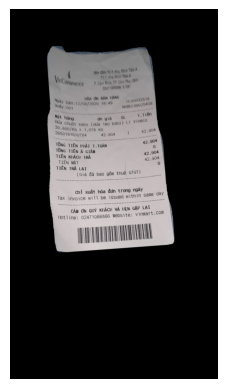

In [131]:
img = rotate_img(img, boxes)
plt.imshow(img)
plt.axis('off')
plt.show()

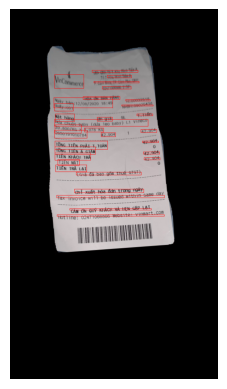

In [132]:
boxes = model.get_boxes(img)
for box in boxes:
  cv2.rectangle(img, (box[0][0], box[0][1]), (box[2][0], box[2][1]), color = (255, 0, 0))
plt.imshow(img)
plt.axis('off')
plt.show()

In [125]:
# import các package cần thiết 

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from CRAFT import CRAFTModel, draw_boxes, draw_polygons, boxes_area, polygons_area

model = CRAFTModel('cuda', use_refiner=True, fp16=True)
train_folder = '../../../dataset/train_images_segmented/'
train_rotated_folder = '../../../dataset/train_images_segmented_rotated/'

for image in os.listdir(train_folder):
    try:
        img = cv2.imread(os.path.join(train_folder, image))
        boxes = model.get_boxes(img)
        rotated_img = rotate_img(img, boxes)
        cv2.imwrite(os.path.join(train_rotated_folder, image), rotated_img)
    except Exception as e:
        print(f"\u274C Error processing image {image}")


/home/nguyenhao/miniconda3/envs/mc_ocr/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nguyenhao/miniconda3/envs/mc_ocr/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import pandas as pd

df = pd.read_csv('../../../dataset/train_images_segmented_rotated/train_images_segmented_rotated.csv')